In [1]:
import tensorflow as tf
from tensorflow import keras

In [13]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
print(tf.__version__)

2.5.0-dev20210218


In [4]:
fashion_mnist = keras.datasets.fashion_mnist

In [5]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 5s 1us/step


In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [7]:
train_images.shape

(60000, 28, 28)

In [8]:
len(train_labels)

60000

In [9]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [10]:
test_images.shape

(10000, 28, 28)

In [11]:
len(test_labels)

10000

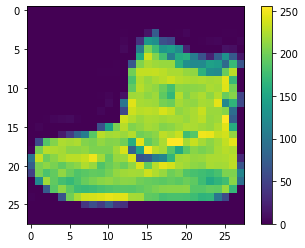

In [14]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [15]:
train_images = train_images / 255.0
test_images = test_images / 255.0

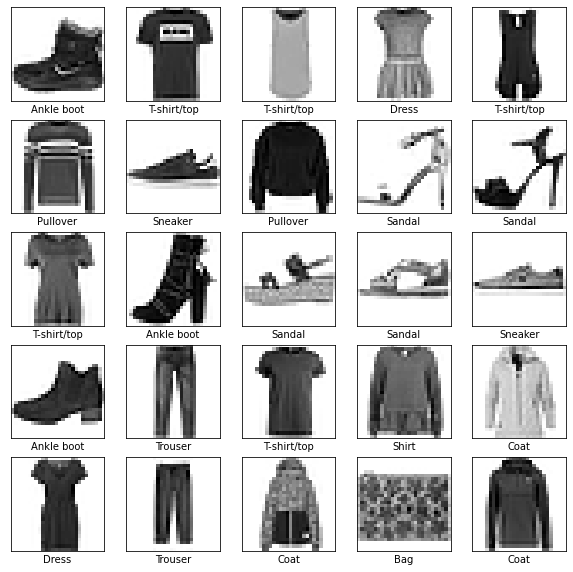

In [17]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [19]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [21]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [22]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.6411 - accuracy: 0.7770
Epoch 2/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3908 - accuracy: 0.8602
Epoch 3/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3370 - accuracy: 0.8759
Epoch 4/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.3088 - accuracy: 0.8863
Epoch 5/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2966 - accuracy: 0.8913 0s - loss: 0.2966 - accura
Epoch 6/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2804 - accuracy: 0.8949
Epoch 7/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.2607 - accuracy: 0.9053
Epoch 8/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.2515 - accuracy: 0.9084
Epoch 9/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.2408 - accuracy: 0.9103
Epoch 10/10
1875/1875 [=======================

In [26]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.3590 - accuracy: 0.8730
Test accuracy: 0.8730000257492065


In [27]:
predictions = model.predict(test_images)

In [28]:
predictions[0]

array([5.2189808e-08, 1.4031634e-10, 1.2580857e-09, 1.2863190e-10,
       4.3274940e-07, 1.1645473e-02, 3.4442500e-08, 3.9165705e-03,
       4.1558522e-07, 9.8443699e-01], dtype=float32)

In [29]:
np.argmax(predictions[0])

9

In [30]:
test_labels[0]

9

In [52]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
        
        plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                           100*np.max(predictions_array),
                                           class_names[true_label]),
                                           color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color='#777777')
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('green')

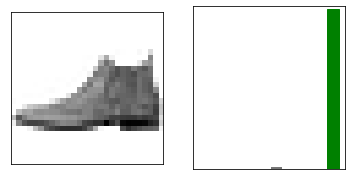

In [50]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()

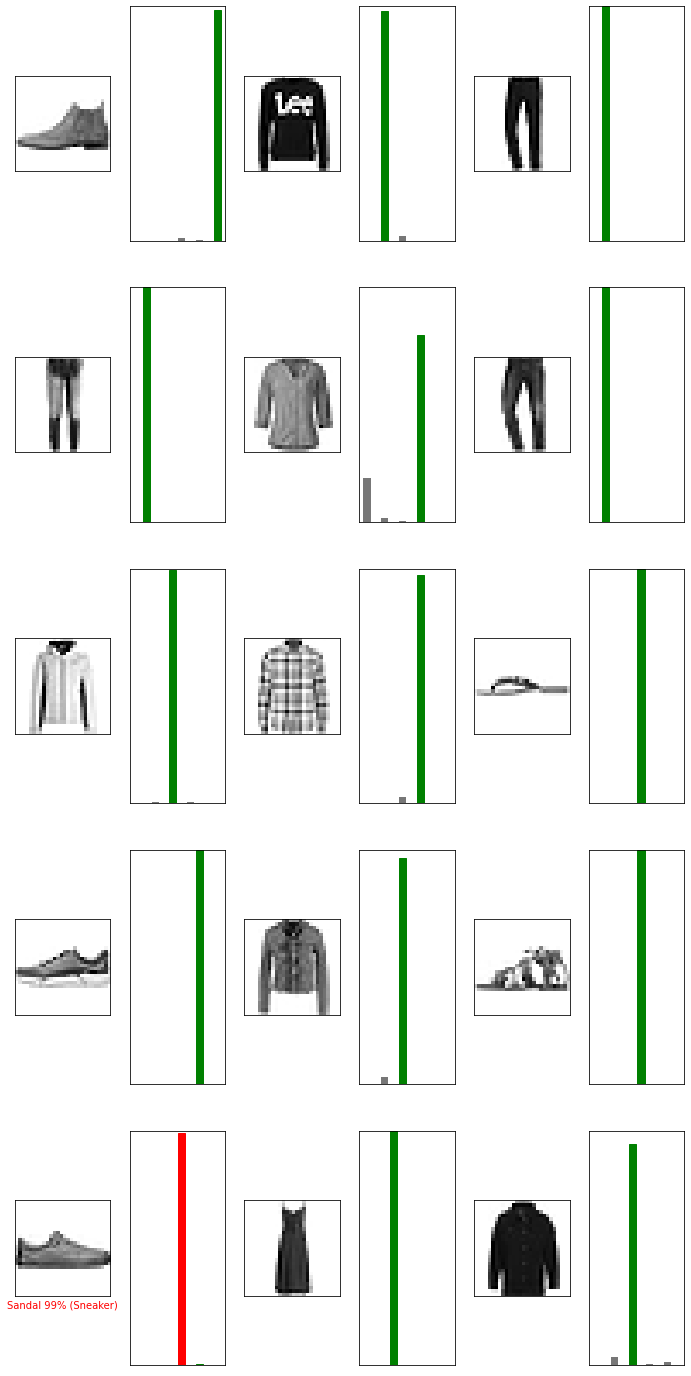

In [53]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*i+1))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)
plt.show()

In [54]:
img = test_images[0]

print(img.shape)

(28, 28)


In [55]:
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [56]:
predictions_single = model.predict(img)

print(predictions_single)

[[5.2189808e-08 1.4031634e-10 1.2580857e-09 1.2863215e-10 4.3275065e-07
  1.1645484e-02 3.4442632e-08 3.9165705e-03 4.1558485e-07 9.8443699e-01]]


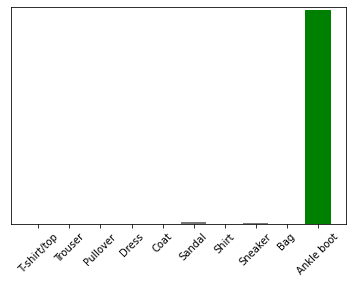

In [58]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [59]:
np.argmax(predictions_single[0])

9